# Ridge Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [14]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)
# plt.plot(x)
# plt.plot(true_fun(x))
# plt.plot(y)

# Przykład 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

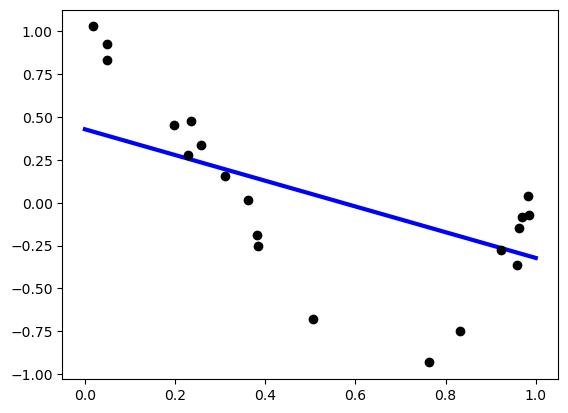

In [15]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


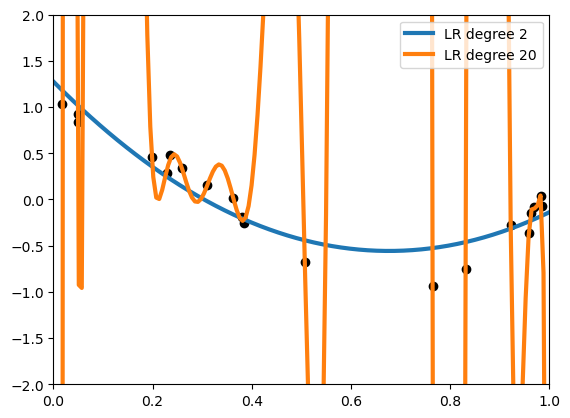

In [19]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001


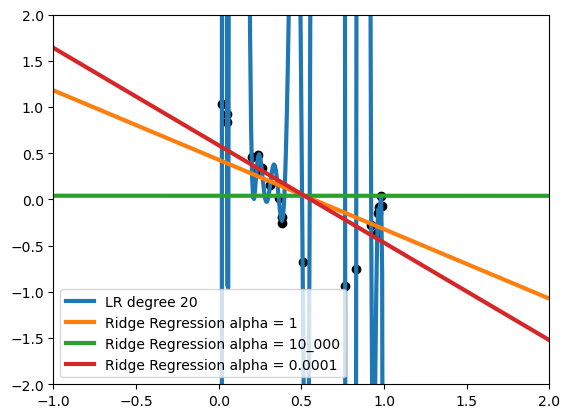

In [25]:
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('Ridge Regression alpha = 1', Ridge(alpha=1.0) ))
models.append(('Ridge Regression alpha = 10_000', Ridge(alpha=10_000.0) ))
models.append(('Ridge Regression alpha = 0.0001', Ridge(alpha=0.0001) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((-1, 2))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha za pomocą komendy **GridSearchCV**. 

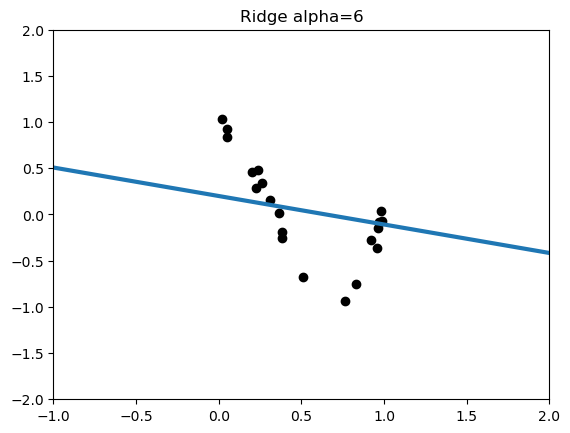

In [39]:
from sklearn.model_selection import GridSearchCV, KFold

seed=123
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

grid = GridSearchCV(Ridge(alpha=1.0),
                    param_grid={'alpha': [0.0001, 0.005, 0.01, 1.0, 5.0, 6.0, 7.0, 10.0, 100.0, 1000.0, 10_000.0]},
                    cv=kfold,
                    refit=False)
grid.fit(x, y)
best_alpha = grid.best_params_['alpha']
best_model = Ridge(alpha=best_alpha)
best_model.fit(x,y)


x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
plt.plot(x_plot, best_model.predict(x_plot),linewidth=3)
plt.xlim((-1, 2))
plt.ylim((-2, 2))
plt.title(f'Ridge alpha={best_alpha}'); 

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [61]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(Ridge(alpha=1.0),
                    param_grid={'alpha': [0.0001, 0.005, 0.01, 1.0, 5.0, 6.0, 7.0, 10.0, 100.0, 1000.0, 10_000.0]},
                    cv=kfold,
                    refit=False)
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['alpha']
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)
print("best_alpha:", best_alpha)
print("R^2:", metrics.r2_score(y_test, best_model.predict(X_test)))

best_alpha: 0.0001
R^2: 0.8994380241089928
